Extract mel-spectrogram from audio

In [1]:
import glob
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.metrics import Precision, Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import preprocess_input
import os
from sklearn.model_selection import KFold


Find graphic specs

In [2]:
def load_data(dir_path):
   X = []
   y = []
   labels = ['PD', 'HC']
   for label in labels:
      path = os.path.join(dir_path, label)
      class_num = labels.index(label)
      for img in os.listdir(path):
         try:
               img_arr = img_to_array(load_img(os.path.join(path, img), target_size=(640, 480)))  # Convert image to array
               X.append(preprocess_input(img_arr))  # Preprocess the image using VGG16's preprocess_input method
               y.append(class_num)
         except Exception as e:
               print(e)
      try:
            return np.array(X), np.array(y)
      except Exception as e:
            print(f'Failed to create numpy arrays: {e}')
            return None, None

In [3]:
X, y = load_data('./plots/')
X = X.reshape(X.shape[0], -1, 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Reshape for RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))


train

In [4]:
# Build the model
model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)


In [5]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[early_stopping])

# Evaluate the model
scores = model.evaluate(X_val, y_val, verbose=0)
print("Loss: %.2f" % scores[0])
print("Accuracy: %.2f%%" % (scores[1] * 100))
print("Precision: %.2f%%" % (scores[2] * 100))
print("Recall: %.2f%%" % (scores[3] * 100))

Epoch 1/20
1/1 [==============================] - 62s 62s/step - loss: 7.4376e-04 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.5066e-09 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 56s 56s/step - loss: 4.5066e-09 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.5007e-12 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 56s 56s/step - loss: 1.5007e-12 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 3.8505e-15 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 56s 56s/step - loss: 3.8505e-15 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.6278e-17 - val_accuracy: 1.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
1/1 [====

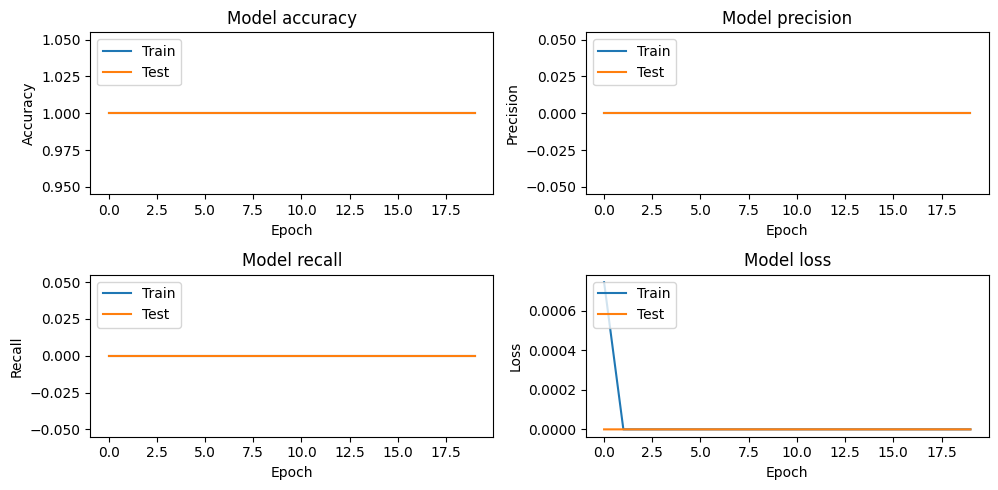

In [6]:
# Plotting accuracy, precision, recall and loss
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2,2,3)
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2,2,4)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()